In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import re
!pip install unidecode
import unidecode
!pip install translate
from translate import Translator
!pip install scholarly
from scholarly import scholarly

**Intento 2: Iterando varios autores.**

In [ ]:
def get_interest_areas(nombre_autor):
    try:
        search_query = scholarly.search_author(nombre_autor)
        autor = next(search_query)
        autor_data = scholarly.fill(autor)
        return autor_data.get('interests', [])
    except StopIteration:
        return []

In [ ]:
# Lista de nombres de investigadores
researcher_names = [''] #'David Requena', 'Mirko Zimic'

# Diccionario para almacenar las áreas de interés de cada investigador
areas_interes_investigadores = {}

for nombre in researcher_names:
    areas_interes = get_interest_areas(nombre)
    areas_interes_investigadores[nombre] = areas_interes

# Imprimir las áreas de interés
for nombre, areas in areas_interes_investigadores.items():
    print(f"Áreas de interés de {nombre}: {', '.join(areas) if areas else 'No se encontraron áreas de interés'}")


Áreas de interés de Claudio Meneses: Genetics and genomics


**Intento 3: Ponerlos en un dataframe**

In [ ]:
import pandas as pd

In [ ]:
# Lista para almacenar los datos
datos_investigadores = []

for nombre in researcher_names:
    areas_interes = get_interest_areas(nombre)
    datos_investigadores.append({'Investigador': nombre, 'Áreas de interés': ', '.join(areas_interes) if areas_interes else 'No se encontraron áreas de interés'})

# Crear un DataFrame
df = pd.DataFrame(datos_investigadores)

# Mostrar el DataFrame
print(df)

    Investigador                                   Áreas de interés
0  David Requena  Bioinformatics, Cancer, Omics, Immunoinformati...
1    Mirko Zimic  Biofísica. Bioinformática. Biotecnología. Enfe...


**Intento 4: Generar la lista de investigadores que tengan areas de interes en google scholar**

In [ ]:
# Lista de nombres de investigadores
researcher_names = ['Elizabeth Tapia','Mauricio Carrillo Tripp', 'Fernando Luis Barroso da Silva',
                          'Claudio Meneses', 'Phillip David Ormeño Vásquez ', 'Omar Caceres',
                          'Dionicia Gamboa Vilela', 'Cesar A. Ramirez-Sarmiento', 'Jose L. Medina-Franco',
                          'Ana Conesa', 'Yang Joon Kim','Miguel Angel Chávez Fumagalli', 'Mirko Zimic',
                          'Edwin Alberto Mellisho Salas', 'David Requena', 'Alejandra Medina-Rivera',
                          'C. Daniela Robles-Espinoza', 'Ronnie G. Gavilan','Javier De Las Rivas',
                          'Wendy Gonzalez', 'mauricio arenas-salinas','Michelle C. Chirinos-Arias, Ph.D.']



In [ ]:
# Lista para almacenar los datos
datos_investigadores = []

for nombre in researcher_names:
    areas_interes = get_interest_areas(nombre)
    datos_investigadores.append({'Investigador': nombre, 'Áreas de interés': ', '.join(areas_interes) if areas_interes else 'No se encontraron áreas de interés'})

# Crear un DataFrame
df = pd.DataFrame(datos_investigadores)

# Mostrar el DataFrame
print(df)

                         Investigador  \
0                     Elizabeth Tapia   
1             Mauricio Carrillo Tripp   
2      Fernando Luis Barroso da Silva   
3                     Claudio Meneses   
4       Phillip David Ormeño Vásquez    
5                        Omar Caceres   
6              Dionicia Gamboa Vilela   
7          Cesar A. Ramirez-Sarmiento   
8               Jose L. Medina-Franco   
9                          Ana Conesa   
10                      Yang Joon Kim   
11      Miguel Angel Chávez Fumagalli   
12                        Mirko Zimic   
13       Edwin Alberto Mellisho Salas   
14                      David Requena   
15            Alejandra Medina-Rivera   
16         C. Daniela Robles-Espinoza   
17                  Ronnie G. Gavilan   
18                Javier De Las Rivas   
19                Javier De Las Rivas   
20                     Wendy Gonzalez   
21            mauricio arenas-salinas   
22  Michelle C. Chirinos-Arias, Ph.D.   

               

**Guardar el df en un excel**

In [ ]:
pip install pandas openpyxl xlsxwriter


In [ ]:
nombre_archivo = 'investigadores_areas_interes.xlsx'
df.to_excel(nombre_archivo, index=False, engine='openpyxl')

print(f'DataFrame guardado en {nombre_archivo}')

DataFrame guardado en investigadores_areas_interes.xlsx


**Paso_2: Generar un network**

In [ ]:
# Cargar los datos del archivo Excel
archivo_excel = '/content/investigadores_areas_interes.xlsx'
df = pd.read_excel(archivo_excel)

**Paso_3: Función - Traducir todo a español**

In [ ]:
# Configurar el traductor
translator = Translator(to_lang="es")

# Función para traducir una cadena
def translate_terms(cadena):
    try:
        return translator.translate(cadena)
    except Exception as e:
        print(f"Error to translate '{cadena}': {e}")
        return cadena

**Paso_4: Función - Nombres de los temas de áreas de interes, que empipecen con mayuscula y lo demas con minuscula**

In [ ]:
# Función para normalizar los términos en 'Áreas de interés'
def format_terms(areas):

    # Separar términos usando delimitadores comunes
    terminos = re.split(r',\s*|\sy\s*|\.\s*| • ', areas)  #Before r',\s*|\sy\s*|\.\s*'
    # Capitalizar cada término
    terminos = [termino.capitalize() for termino in terminos if termino]
    return ', '.join(terminos)

Aplicar funciones

In [ ]:
# Traducir las áreas de interés
df['Áreas de interés'] = df['Áreas de interés'].apply(lambda x: ', '.join([translate_terms(term) for term in x.split(', ')]))

# Guardar el DataFrame traducido en un nuevo archivo Excel
archivo_traducido = '/content/translate_investigadores_areas_interes.xlsx'
df.to_excel(archivo_traducido, index=False)

print(f'DataFrame traducido guardado en {archivo_traducido}')

# Aplicar la función a la columna correspondiente
df['Áreas de interés'] = df['Áreas de interés'].apply(format_terms)


DataFrame traducido guardado en /content/translate_investigadores_areas_interes.xlsx


**Paso_5: Generar versión final de Network**

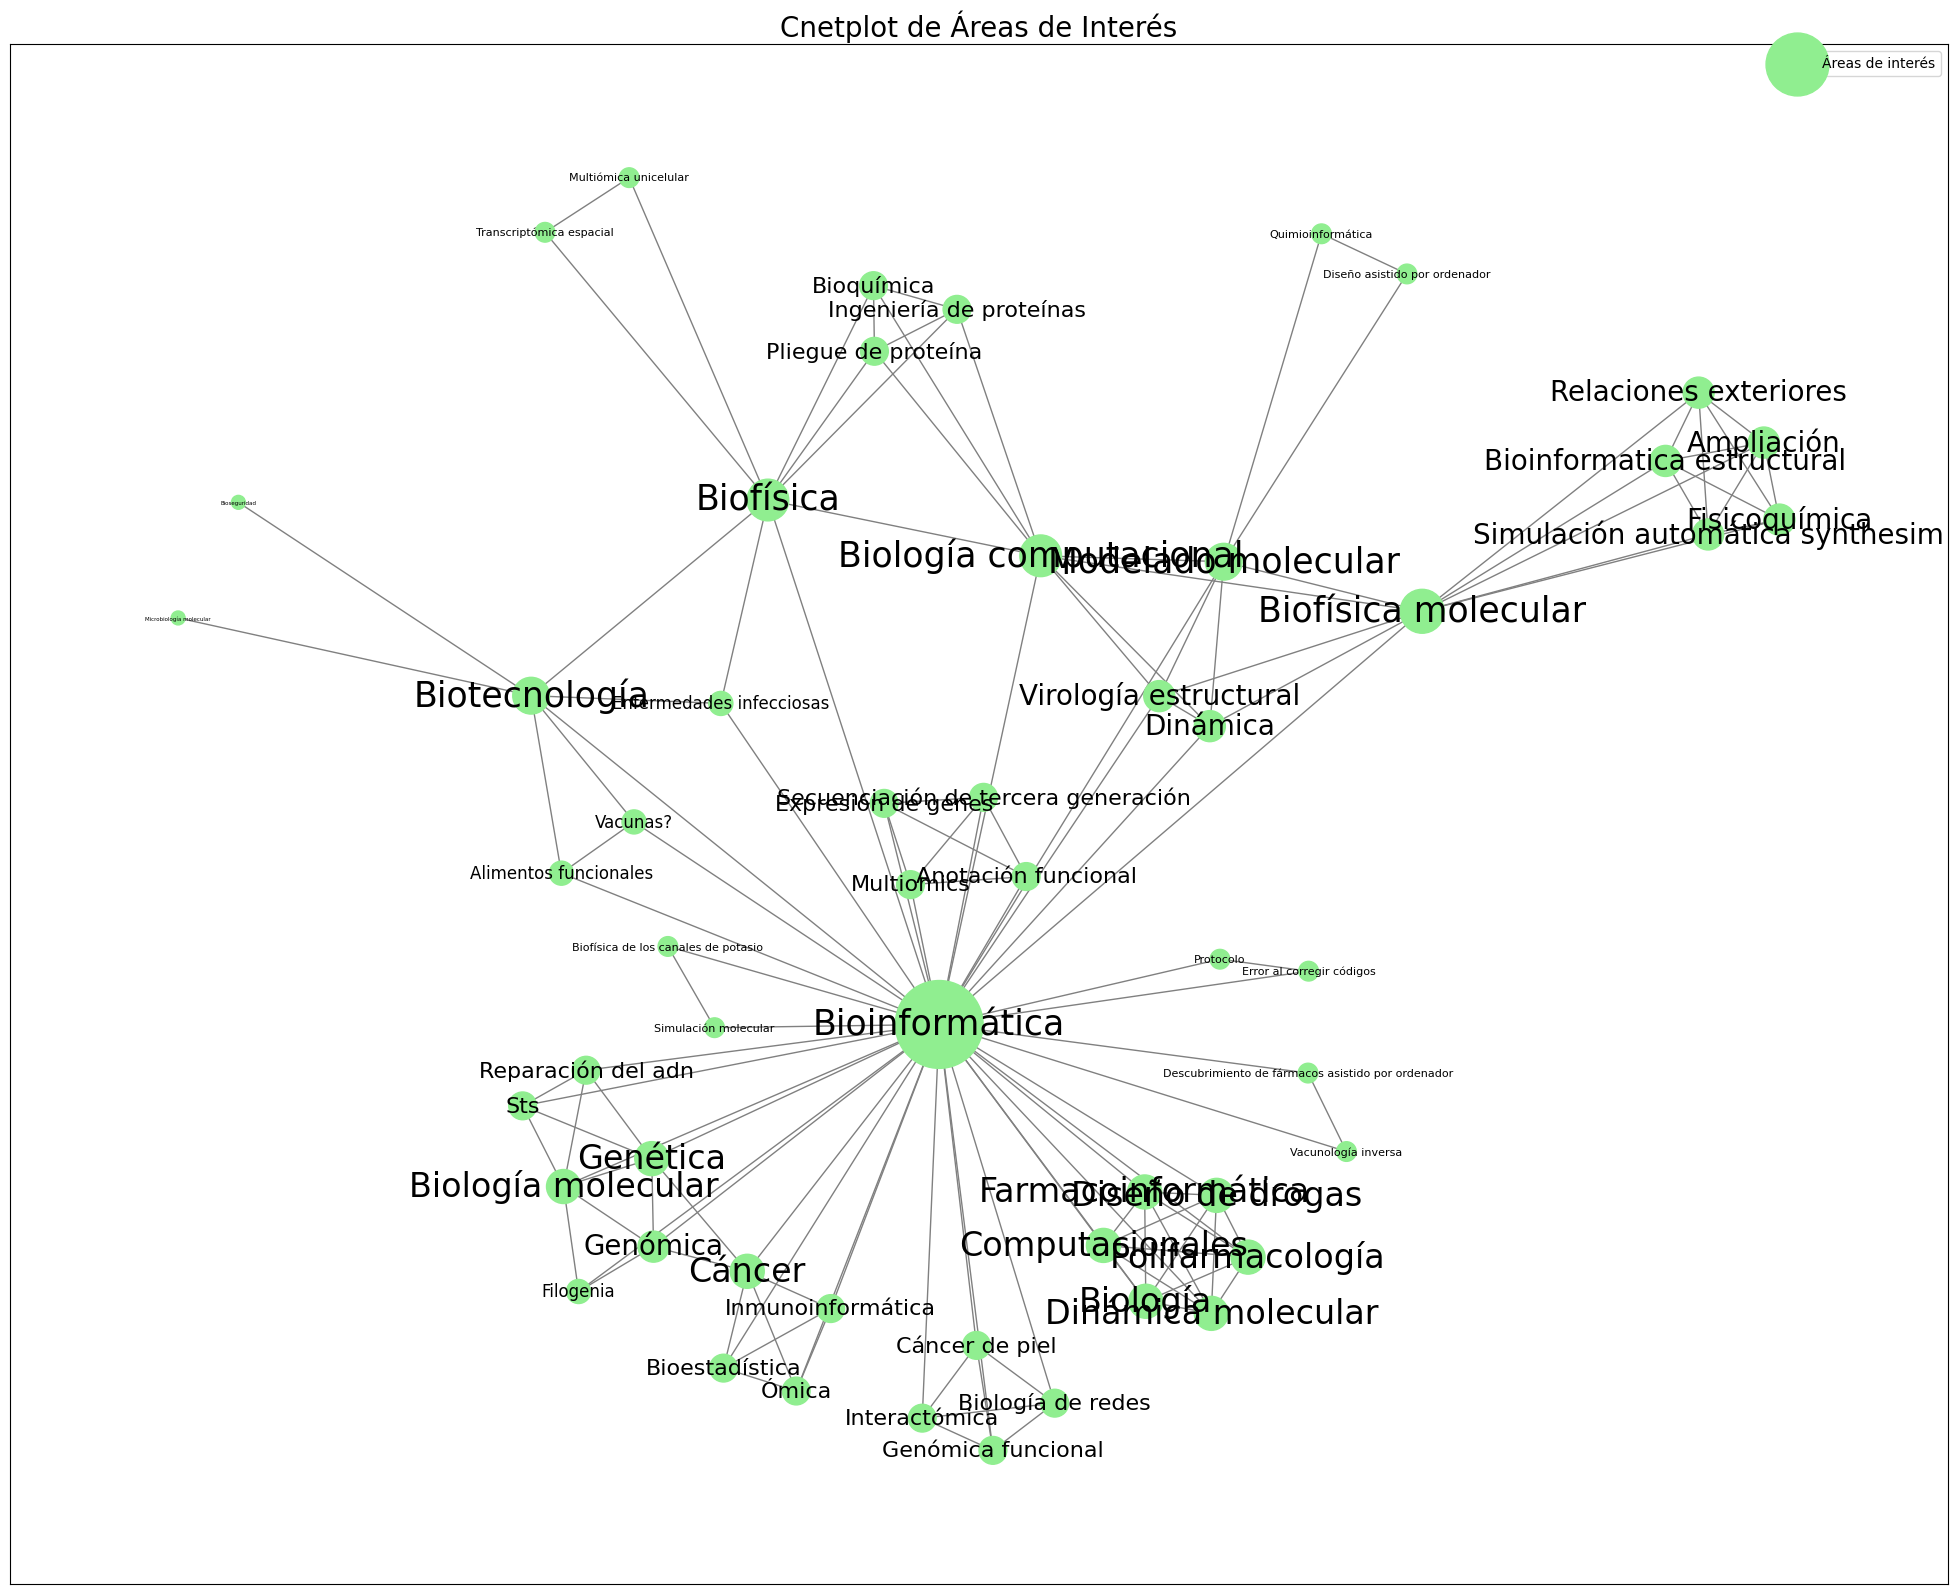

In [ ]:
# Crear un gráfico de red
G = nx.Graph()

# Agregar nodos y aristas al gráfico
for idx, row in df.iterrows():
    investigador = row[nombre_columna_investigador]
    areas_interes = re.split(r',\s*|\sy\s*|\.\s*', row[nombre_columna_areas])
    for i in range(len(areas_interes)):
        for j in range(i + 1, len(areas_interes)):
            G.add_node(areas_interes[i], type='area')
            G.add_node(areas_interes[j], type='area')
            G.add_edge(areas_interes[i], areas_interes[j])

# Encontrar los componentes conectados y sus tamaños
componentes_conectados = list(nx.connected_components(G))
componentes_tamano = [len(componente) for componente in componentes_conectados]

# Identificar y eliminar los componentes pequeños
umbral_tamano = 5  # Ajusta este umbral según sea necesario
componentes_a_eliminar = [componente for componente in componentes_conectados if len(componente) < umbral_tamano]

for componente in componentes_a_eliminar:
    G.remove_nodes_from(componente)

# Calcular el tamaño de los nodos y las etiquetas basado en el grado (número de aristas)
node_sizes = [G.degree(node) * 100 for node in G.nodes()]
max_font_size = 25
label_font_sizes = {node: min(G.degree(node) * 4, max_font_size) for node in G.nodes()}

# Dibujar el gráfico de red actualizado
pos = nx.spring_layout(G)
areas = [node for node, data in G.nodes(data=True) if data['type'] == 'area']

plt.figure(figsize=(25, 20))
nx.draw_networkx_nodes(G, pos, nodelist=areas, node_color='lightgreen', node_size=node_sizes, label='Áreas de interés')
nx.draw_networkx_edges(G, pos, edge_color='gray')

# Dibujar etiquetas con tamaños proporcionales
for node, (x, y) in pos.items():
    plt.text(x, y, node, fontsize=label_font_sizes[node], ha='center', va='center')

plt.legend(scatterpoints=1)
plt.title('Cnetplot de Áreas de Interés', fontsize=20)  # Aumentar el tamaño de la fuente del título

# Guardar la imagen
nombre_imagen = '/content/cnetplot_areas_interes.png'
plt.savefig(nombre_imagen, format='png')
plt.show()

Step_6: Extraer los títulos de los papers de cada autor.

In [ ]:
import pandas as pd

In [ ]:
df_interest = pd.read_excel('/content/translate_profiles.xlsx')

In [ ]:
df_main = pd.read_excel('/content/profiles_v2.xlsx')

In [ ]:
df_main

,container_type,filled,source,scholar_id,url_picture,name,affiliation,email_domain,interests,citedby,...,hindex,hindex5y,i10index,i10index5y,cites_per_year,coauthors,publications,public_access,organization,homepage
0,Author,"['basics', 'indices', 'counts', 'coauthors', '...",AuthorSource.SEARCH_AUTHOR_SNIPPETS,vNUOkTkAAAAJ,https://scholar.google.com/citations?view_op=m...,Elizabeth Tapia,CIFASIS-Conicet-UNR & FCEIA-EIE-UNR,@cifasis-conicet.gov.ar,"['Bioinformatics', 'Error Correcting Codes', '...",685,...,13,11,21,12,"{2001: 7, 2002: 2, 2003: 4, 2004: 7, 2005: 6, ...",[],"[{'container_type': 'Publication', 'source': <...","{'available': 15, 'not_available': 1}",,NaN
1,Author,"['basics', 'indices', 'counts', 'coauthors', '...",AuthorSource.SEARCH_AUTHOR_SNIPPETS,V8YQC4YAAAAJ,https://scholar.google.com/citations?view_op=m...,Mauricio Carrillo-Tripp,Biomolecular Diversity Laboratory. Cinvestav M...,@cinvestav.mx,"['Computational biology', 'Molecular biophysic...",1382,...,17,12,21,15,"{2004: 13, 2005: 11, 2006: 27, 2007: 30, 2008:...","[{'container_type': 'Author', 'filled': [], 's...","[{'container_type': 'Publication', 'source': <...","{'available': 7, 'not_available': 0}",5271706690650430464,http://tripplab.com/
2,Author,"['basics', 'indices', 'counts', 'coauthors', '...",AuthorSource.SEARCH_AUTHOR_SNIPPETS,YmyPvhoAAAAJ,https://scholar.google.com/citations?view_op=m...,Fernando Luis Barroso da Silva,"Associate Professor, University of São Paulo",@fcfrp.usp.br,"['Molecular Biophysics', 'Structural Bioinform...",1593,...,25,19,39,31,"{2000: 12, 2001: 23, 2002: 29, 2003: 22, 2004:...","[{'container_type': 'Author', 'filled': [], 's...","[{'container_type': 'Publication', 'source': <...","{'available': 18, 'not_available': 3}",4833850012421173248,https://barrosolab.fcfrp.usp.br/
3,Author,"['basics', 'indices', 'counts', 'coauthors', '...",AuthorSource.SEARCH_AUTHOR_SNIPPETS,JHIi-1oAAAAJ,https://scholar.google.com/citations?view_op=m...,Claudio Meneses,Fac. de Agronomía Sist. Naturales/ Fac. de Cs....,@uc.cl,['Genetics and genomics'],2041,...,27,23,68,57,"{2008: 10, 2009: 25, 2010: 12, 2011: 32, 2012:...","[{'container_type': 'Author', 'filled': [], 's...","[{'container_type': 'Publication', 'source': <...","{'available': 12, 'not_available': 0}",7459009050823923712,https://biologia.uc.cl/meneses-claudio/
4,Author,"['basics', 'indices', 'counts', 'coauthors', '...",AuthorSource.SEARCH_AUTHOR_SNIPPETS,7tkz3iMAAAAJ,https://scholar.google.com/citations?view_op=m...,Phillip David Ormeño Vásquez,Universidad Nacional de Cañete,@undc.edu.pe,['Biotecnologia y Microbiología Molecular'],15,...,2,2,1,1,"{2019: 1, 2020: 0, 2021: 2, 2022: 5, 2023: 6, ...",[],"[{'container_type': 'Publication', 'source': <...","{'available': 0, 'not_available': 0}",,NaN
5,Author,"['basics', 'indices', 'counts', 'coauthors', '...",AuthorSource.SEARCH_AUTHOR_SNIPPETS,a48jqn8AAAAJ,https://scholar.google.com/citations?view_op=m...,Omar Caceres,Instituto Nacional de Salud del Peru,@ins.gob.pe,"['Molecular Biology', 'Genomics', 'Bioinformat...",2126,...,12,10,16,10,"{2010: 8, 2011: 13, 2012: 9, 2013: 34, 2014: 2...","[{'container_type': 'Author', 'filled': [], 's...","[{'container_type': 'Publication', 'source': <...","{'available': 11, 'not_available': 0}",11659092372863350784,http://www.ins.gob.pe/
6,Author,"['basics', 'indices', 'counts', 'coauthors', '...",AuthorSource.SEARCH_AUTHOR_SNIPPETS,46KUlM0AAAAJ,https://scholar.google.com/citations?view_op=m...,DIONICIA GAMBOA VILELA,Universidad Peruana Cayetano Heredia,@upch.pe,['Cellular and Molecular Biology'],5778,...,40,31,84,70,"{2008: 22, 2009: 27, 2010: 70, 2011: 102, 2012...",[],"[{'container_type': 'Publication', 'source': <...","{'available': 88, 'not_available': 0}",16020081805179199488,https://www.cayetano.edu.pe/cayetano/es/
7,Author,"['basics', 'indices', 'counts', 'coauthors', '...",AuthorSource.SEARCH_AUTHOR_SNIPPETS,sCAGo3kAAAAJ,https://scholar.google.com/citations?view_op=m...,Cesar A. Ramirez-Sarmiento

In [ ]:
import pandas as pd

In [10]:
# Path to the Excel file
excel_file_path = '/content/profiles_v2.xlsx'

# Load the Excel file into a DataFrame
df = pd.read_excel(excel_file_path)

# Check the columns in the DataFrame
print("Columns in the DataFrame:", df.columns)


Columns in the DataFrame: Index(['container_type', 'filled', 'source', 'scholar_id', 'url_picture',
       'name', 'affiliation', 'email_domain', 'interests', 'citedby',
       'citedby5y', 'hindex', 'hindex5y', 'i10index', 'i10index5y',
       'cites_per_year', 'coauthors', 'publications', 'public_access',
       'organization', 'homepage'],
      dtype='object')


In [12]:
# Extract the titles of the papers in the 'publications' column
def extract_titles(publications):
    titles = []
    for pub in publications:
        try:
            title = pub.get('bib', {}).get('title', None)
            if title:
                titles.append(title)
        except AttributeError:
            continue
    return titles



In [26]:
df['publications']

SyntaxError: invalid syntax (<ipython-input-26-844cb222b201>, line 1)

In [14]:
if 'publications' in df.columns:
    df['titles'] = df['publications'].apply(eval).apply(extract_titles)
    for idx, titles in enumerate(df['titles']):
        print(f"Author {idx+1} paper titles:")
        for title in titles:
            print(f" - {title}")
else:
    print("The 'publications' column is not found in the Excel file.")

SyntaxError: unterminated string literal (detected at line 1) (<string>, line 1)

Generar los nuevos archivo con la data final de ponentes

1. Extract names from .txt

In [34]:
# Read the contents of the file
file_path = '/content/researchers.txt'
with open(file_path, 'r', encoding='utf-8') as file:
    researcher_names = file.read().splitlines()

# Display the list of names
print(researcher_names)



['Omar Caceres', 'Ronnie G. Gavilan', 'Victor Jiménez-Vásquez, MSc.', 'Edwin Alberto Mellisho Salas', 'Michelle C. Chirinos-Arias, Ph.D.', 'Dan Erick Vivas Ruiz', 'Gustavo Adolfo Sandoval Peña', 'Pablo Sergio Ramirez Roca', 'Jorge L. Ramirez', 'Miguel Angel Chávez Fumagalli', 'Luis Tataje-Lavanda', 'MIRKO ZIMIC PERALTA', 'DIONICIA GAMBOA VILELA', 'Martha S. Calderon', 'David Requena, Ph.D.', 'Edgar Gonzalez-Kozlova', 'Yang Joon Kim', 'Pierina Danos', 'Rydberg Roman Supo Escalante', 'Ana Cecilia Romani Vasquez', 'Luis F. Soto-Ugaldi', 'Jack Aldhair Medico', 'Cesar A. Ramirez-Sarmiento', 'Phillip David Ormeño Vásquez', 'Claudio Meneses', 'mauricio arenas-salinas', 'Wendy Gonzalez', 'Ingo Dreyer', 'Estanislao Márquez', 'Miguel Angel Chávez Fumagalli', 'Arce-Johnson P & Arcejohnson & P Arce', 'David Ramirez', 'Mauricio Carrillo Tripp', 'C. Daniela Robles-Espinoza', 'Jose L. Medina-Franco', 'Alejandra Medina-Rivera', 'Javier De Las Rivas', 'Ana Conesa', 'Estefania Torrejón', 'Fernando Luis 

In [36]:
#researcher_names = ['Omar Caceres', 'Ronnie G. Gavilan']
len(researcher_names)

43

2. Generar el excel de los titulos de cada profile.

In [35]:
#### First ###
# Dictionary to store paper titles by author
authors_papers = {}

# Iterate over each author, retrieve their data, and extract paper titles
for name in researcher_names:
    search_query = scholarly.search_author(name)
    try:
        author = next(search_query)
        author_data = scholarly.fill(author)
        # Extract paper titles
        titles = [pub['bib']['title'] for pub in author_data['publications']]
        # Store titles in the dictionary
        authors_papers[name] = titles
    except StopIteration:
        print(f"No information found for author: {name}")

# Create the DataFrame with researcher names and paper titles
data = {
    'Researcher': [],
    'Paper Titles': []
}

for author, titles in authors_papers.items():
    data['Researcher'].append(author)
    data['Paper Titles'].append(", ".join(titles))

df = pd.DataFrame(data)

# Save the DataFrame to an Excel file
excel_file_path = '/content/titles_scholar_profile.xlsx'
df.to_excel(excel_file_path, index=False)

print(f"Data saved to {excel_file_path}")

# Print paper titles by author
#for author, titles in authors_papers.items():
#    print(f"Paper titles of {author}:")
#    for title in titles:
#        print(f"- {title}")
#    print()

Data saved to /content/titles_scholar_profile.xlsx
